In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [3]:
path_1= "https://raw.githubusercontent.com/Mancini997/vanguard-ab-test/main/data/raw/df_final_web_data_pt_1.csv"
df_web_1 = pd.read_csv(path_1,sep=';')
path_2= "https://raw.githubusercontent.com/Mancini997/vanguard-ab-test/main/data/raw/df_final_web_data_pt_2.csv"
df_web_2 = pd.read_csv(path_2,sep=';')

path_3 = "https://raw.githubusercontent.com/Mancini997/vanguard-ab-test/main/data/raw/df_final_demo.csv"

df_final_demo = pd.read_csv(path_3, sep=';')

path_4 ='https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_experiment_clients.txt'
final_experiment = pd.read_csv(path_4, sep=',')
pd.set_option('display.max_columns', None)

In [4]:
df_web_1.head(1)

client_id            visitor_id                      visit_id process_step  \
0    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   

             date_time  
0  2017-04-17 15:27:07

In [5]:
df_web_2.head()

client_id             visitor_id                      visit_id  \
0     763412  601952081_10457207388  397475557_40440946728_419634   
1    6019349  442094451_91531546617  154620534_35331068705_522317   
2    6019349  442094451_91531546617  154620534_35331068705_522317   
3    6019349  442094451_91531546617  154620534_35331068705_522317   
4    6019349  442094451_91531546617  154620534_35331068705_522317   

  process_step            date_time  
0      confirm  2017-06-06 08:56:00  
1      confirm  2017-06-01 11:59:27  
2       step_3  2017-06-01 11:58:48  
3       step_2  2017-06-01 11:58:08  
4       step_1  2017-06-01 11:57:58

In [6]:
#Merging the Web dataframe in we_df.
web_df =pd.concat([df_web_1, df_web_2], axis=0, join="inner")

In [7]:
#Checking null values
web_df.isnull().any()

client_id       False
visitor_id      False
visit_id        False
process_step    False
date_time       False
dtype: bool

In [8]:
#checking nan values
web_df.isna().sum().any()

False

In [9]:
#checking unique values
web_df['process_step'].unique()

array(['step_3', 'step_2', 'step_1', 'start', 'confirm'], dtype=object)

In [10]:
web_df.duplicated().sum()

10764

In [11]:
web_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
412259    False
412260    False
412261    False
412262    False
412263    False
Length: 755405, dtype: bool

In [12]:
web_df.shape

(755405, 5)

In [13]:
web_df.dropna(inplace=True)

In [14]:
df_final_demo.head(10)

client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976             6.0              73.0      60.5     U        2.0   
1    2304905             7.0              94.0      58.0     U        2.0   
2    1439522             5.0              64.0      32.0     U        2.0   
3    1562045            16.0             198.0      49.0     M        2.0   
4    5126305            12.0             145.0      33.0     F        2.0   
5    3727881             5.0              71.0      30.5     U        2.0   
6     272934             5.0              66.0      58.5     U        2.0   
7     388801            30.0             361.0      57.5     M        5.0   
8     285619            30.0             369.0      67.5     M        2.0   
9    8198645            15.0             189.0      54.5     F        2.0   

         bal  calls_6_mnth  logons_6_mnth  
0   45105.30           6.0            9.0  
1  110860.30           6.0            9.0  
2   52467.79           6.0            9.0  
3   67454.65           3.0            6.0  
4  103671.75           0.0            3.0  
5   23915.60           0.0            3.0  
6   27021.42           2.0            5.0  
7  522498.72           1.0            4.0  
8  299388.72           3.0            6.0  
9  382303.83           6.0            9.0

In [15]:
df_final_demo.shape

(70609, 9)

In [16]:
final_experiment

client_id Variation
0        9988021      Test
1        8320017      Test
2        4033851   Control
3        1982004      Test
4        9294070   Control
...          ...       ...
70604    2443347       NaN
70605    8788427       NaN
70606     266828       NaN
70607    1266421       NaN
70608    9895983       NaN

[70609 rows x 2 columns]

In [17]:
web_demo =pd.merge(df_final_demo, web_df, on= 'client_id')
                  

In [18]:
full_data = pd.merge(web_demo, final_experiment, on ='client_id')

In [19]:
full_data.shape

(449831, 14)

In [20]:
full_data.select_dtypes("object").nunique().sort_values(ascending=False)

date_time       384038
visit_id         96773
visitor_id       78187
process_step         5
gendr                4
Variation            2
dtype: int64

In [21]:
full_data.dropna(inplace=True)

In [22]:
full_data.isna().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
visitor_id          0
visit_id            0
process_step        0
date_time           0
Variation           0
dtype: int64

In [28]:
full_data.reset_index(drop=True, inplace=True)

In [29]:
full_data.shape

(321195, 14)

In [30]:
web_demo.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
visitor_id           object
visit_id             object
process_step         object
date_time            object
dtype: object

In [31]:
full_data['date_time'] = pd.to_datetime(full_data['date_time'])

In [39]:
numeric_columns = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']
full_data[numeric_columns] = full_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Define function to remove outliers using IQR
def remove_outliers(df, column_name):
    q1 = full_data[column_name].quantile(0.25)
    q3 = full_data[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    filtered_df = df[(full_data[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return filtered_df
numeric_columns = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']


# Remove outliers for numeric columns before proceeding with analysis
for column in numeric_columns:
    full_data = remove_outliers(full_data, column)

# Sort the data by client_id, process_step, Variation, and date_time
df = full_data.sort_values(by=['visit_id', 'process_step', 'Variation', 'date_time'])

# Calculate time spent at each process_step
df['time_spent'] = df.groupby(['visit_id', 'process_step', 'Variation'])['date_time'].diff().shift(-1)

# Fill NaT values with 0 for the last entry of each process_step
df['time_spent'] = df['time_spent'].fillna(pd.Timedelta(0))

# Aggregate time spent for each client_id at each process_step and Variation
time_spent_per_step = df.groupby(['visit_id', 'process_step', 'Variation','date_time'])['time_spent'].sum().reset_index()

time_spent_per_step.head(50)

visit_id process_step Variation           date_time  \
0   100012776_37918976071_457913      confirm      Test 2017-04-26 13:22:17   
1   100012776_37918976071_457913      confirm      Test 2017-04-26 13:23:09   
2    100019538_17884295066_43909      confirm      Test 2017-04-09 16:24:58   
3    100019538_17884295066_43909        start      Test 2017-04-09 16:20:56   
4    100019538_17884295066_43909        start      Test 2017-04-09 16:21:45   
5    100019538_17884295066_43909        start      Test 2017-04-09 16:21:59   
6    100019538_17884295066_43909       step_1      Test 2017-04-09 16:21:12   
7    100019538_17884295066_43909       step_1      Test 2017-04-09 16:21:35   
8    100019538_17884295066_43909       step_1      Test 2017-04-09 16:21:41   
9    100019538_17884295066_43909       step_1      Test 2017-04-09 16:22:04   
10   100019538_17884295066_43909       step_2      Test 2017-04-09 16:21:21   
11   100019538_17884295066_43909       step_2      Test 2017-04-09 16:22:08   
12   100019538_17884295066_43909       step_3      Test 2017-04-09 16:24:01   
13  100022086_87870757897_149620      confirm      Test 2017-05-23 20:47:01   
14  100022086_87870757897_149620        start      Test 2017-05-23 20:44:01   
15  100022086_87870757897_149620       step_1      Test 2017-05-23 20:44:23   
16  100022086_87870757897_149620       step_2      Test 2017-05-23 20:45:08   
17  100022086_87870757897_149620       step_3      Test 2017-05-23 20:46:01   
18  100030127_47967100085_936361        start   Control 2017-03-22 11:07:49   
19  100057941_88477660212_944512        start   Control 2017-04-09 11:30:10   
20  100057941_88477660212_944512       step_1   Control 2017-04-09 11:30:40   
21  100057941_88477660212_944512       step_1   Control 2017-04-09 11:33:21   
22  100057941_88477660212_944512       step_2   Control 2017-04-09 11:31:50   
23  100057941_88477660212_944512       step_2   Control 2017-04-09 11:33:58   
24  100057941_88477660212_944512       step_3   Control 2017-04-09 11:32:54   
25  100057941_88477660212_944512       step_3   Control 2017-04-09 11:34:24   
26  100071743_53464757454_616703        start   Control 2017-04-07 10:50:20   
27   10007589_47780784567_391490      confirm   Control 2017-05-18 08:03:33   
28   10007589_47780784567_391490        start   Control 2017-05-18 07:51:32   
29   10007589_47780784567_391490       step_1   Control 2017-05-18 07:54:19   
30   10007589_47780784567_391490       step_2   Control 2017-05-18 07:55:05   
31   10007589_47780784567_391490       step_3   Control 2017-05-18 07:58:06   
32   100096068_8301717872_987164        start   Control 2017-05-22 18:15:01   
33   100096068_8301717872_987164       step_1   Control 2017-05-22 18:15:14   
34  100105975_18174738494_196339        start   Control 2017-04-10 06:30:17   
35  100105975_18174738494_196339        start   Control 2017-04-10 06:30:30   
36   100253265_79786188559_15799        start      Test 2017-06-04 18:50:58   
37   100253265_79786188559_15799       step_1      Test 2017-06-04 18:51:59   
38   100253265_79786188559_15799       step_2      Test 2017-06-04 18:52:16   
39   100253265_79786188559_15799       step_3      Test 2017-06-04 18:53:12   
40  100254180_47139859079_984581      confirm   Control 2017-04-05 21:47:43   
41  100254180_47139859079_984581        start   Control 2017-04-05 21:42:02   
42  100254180_47139859079_984581       step_1   Control 2017-04-05 21:42:54   
43  100254180_47139859079_984581       step_2   Control 2017-04-05 21:43:46   
44  100254180_47139859079_984581       step_3   Control 2017-04-05 21:44:43   
45  100293270_70949014562_696814      confirm      Test 2017-04-18 14:17:20   
46  100293270_70949014562_696814        start      Test 2017-04-18 14:13:51   
47  100293270_70949014562_696814       step_1      Test 2017-04-18 14:14:02   
48  100293270_70949014562_696814       step_2      Test 2017-04-18 14:15:40   
49  100293270_70949014562_696814       step_3      Test 2017-04-18 14:16:3

In [90]:
time_spent_per_step = time_spent_per_step.sort_values(by=['visit_id', 'date_time'])

# Identify backward steps within each visit_id
time_spent_per_step['back_step'] = time_spent_per_step.groupby('visit_id')['process_step'].shift(1)

# Count occurrences of backward steps (step down)
backward_counts = (time_spent_per_step[time_spent_per_step['back_step'] > time_spent_per_step['process_step']]
                   .groupby(['process_step', 'Variation'])['visit_id']
                   .size()
                   .reset_index(name='backward_count'))

# Reorder process_step according to the desired order
process_step_order = ['start', 'step_1', 'step_2', 'step_3','confirm']
backward_counts['process_step'] = pd.Categorical(backward_counts['process_step'], categories=process_step_order, ordered=True)

# Pivot the table to display backward counts for each process_step and Variation
backward_counts_pivot = backward_counts.pivot(index='process_step', columns='Variation', values='backward_count').fillna(0)

backward_counts_pivot

C:\Users\Davide\AppData\Local\Temp\ipykernel_9780\1044703796.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['process_step', 'Variation'])['visit_id']


Variation     Control   Test
process_step                
start            2599   6374
step_1           1357   2033
step_2           1560   1282
step_3              0      0
confirm          9486  11538

In [104]:
##Backward from step_3
time_spent_per_step = pd.DataFrame(time_spent_per_step)

# Example of filtering backward movements from step_3
backward_from_step_3 = time_spent_per_step[(time_spent_per_step['back_step'] == 'step_3') & 
                                           (time_spent_per_step['process_step'] != 'confirm')]

# Count the occurrences of backward steps for each visitor ID and each variation
backward_counts = backward_from_step_3.groupby(['visit_id', 'Variation']).size().reset_index(name='backward_count')

# Pivot table to display backward counts for each visitor ID and Variation
backward_step_3_pivot = backward_counts.pivot(index='visit_id', columns='Variation', values='backward_count').count().fillna(0)


backward_step_3_pivot

Variation
Control    2293
Test       2401
dtype: int64

<Axes: xlabel='process_step'>

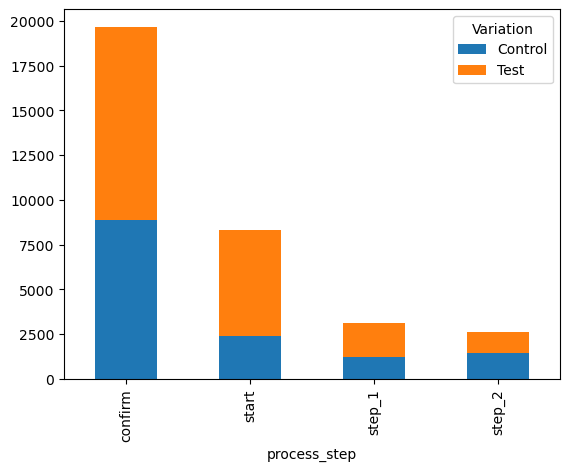

In [100]:
backward_counts_pivot.plot(kind="bar", stacked=True)

In [65]:

# Sort the dataframe by visit_id and process_step (assuming 'confirm', 'start', 'step_1', ...)
process_step_order = ['confirm', 'start', 'step_1', 'step_2', 'step_3']
time_spent_per_step['process_step'] = pd.Categorical(time_spent_per_step['process_step'], categories=process_step_order, ordered=True)
time_spent_per_step = time_spent_per_step.sort_values(by=['visit_id', 'process_step'])

# Group by visit_id and process_step, count occurrences, and then count unique visit_id
step_counts = time_spent_per_step.groupby(['process_step', 'Variation']) \
    .agg(total_steps=('visit_id', 'size'), unique_visitors=('visit_id', 'nunique')) \
    .reset_index()
step_counts

C:\Users\Davide\AppData\Local\Temp\ipykernel_9780\1069051173.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  step_counts = time_spent_per_step.groupby(['process_step', 'Variation']) \


process_step Variation  total_steps  unique_visitors
0      confirm   Control        10519             9784
1      confirm      Test        14964            12908
2        start   Control        27345            18735
3        start      Test        34097            20516
4       step_1   Control        17886            14347
5       step_1      Test        24103            17621
6       step_2   Control        16093            12548
7       step_2      Test        19125            15267
8       step_3   Control        14044            11365
9       step_3      Test        15871            13792

In [105]:
# Filter for 'confirm' process_step
confirm_data = time_spent_per_step[time_spent_per_step['process_step'] == 'confirm']

# Group by Variation and count unique visit_id
conversion_counts = confirm_data.groupby('Variation')['visit_id'].nunique().reset_index()

# Calculate total unique visit_id
total_visitors = conversion_counts['visit_id'].sum()

# Calculate conversion rate %
conversion_counts['conversion_rate'] = (conversion_counts['visit_id'] / total_visitors) * 100

conversion_counts

Variation  visit_id  conversion_rate
0   Control      9784        43.116517
1      Test     12908        56.883483

In [23]:
variation_counts = full_data['Variation'].value_counts()

# Sum the counts
total_count = variation_counts.sum()

print("Counts of each Variation:")
print(variation_counts)
print("\nTotal Count of Variations:", total_count)

Counts of each Variation:
Variation
Test       177787
Control    143408
Name: count, dtype: int64

Total Count of Variations: 321195


In [106]:
time_spent_per_step.groupby(['process_step', 'Variation'])['time_spent'].mean()

C:\Users\Davide\AppData\Local\Temp\ipykernel_9780\573531469.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_spent_per_step.groupby(['process_step', 'Variation'])['time_spent'].mean()


process_step  Variation
confirm       Control     0 days 00:00:12.416959787
              Test        0 days 00:00:36.710304731
start         Control     0 days 00:01:10.525105138
              Test        0 days 00:01:22.875619555
step_1        Control     0 days 00:00:56.704741138
              Test        0 days 00:01:14.517072563
step_2        Control     0 days 00:00:48.216243087
              Test        0 days 00:00:57.078640522
step_3        Control     0 days 00:00:38.525989746
              Test        0 days 00:00:45.726671287
Name: time_spent, dtype: timedelta64[ns]

In [107]:
time_spent_per_step.groupby('process_step')[["time_spent"]].mean()

C:\Users\Davide\AppData\Local\Temp\ipykernel_9780\2599870113.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_spent_per_step.groupby('process_step')[["time_spent"]].mean()


time_spent
process_step                          
confirm      0 days 00:00:26.682376486
start        0 days 00:01:17.378975293
step_1       0 days 00:01:06.929576793
step_2       0 days 00:00:53.028934067
step_3       0 days 00:00:42.346214273